In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.animation import FuncAnimation
#%matplotlib widget

In [2]:
def fun(x, y) :
    return (x ** 2) - (y ** 2)

### Multivariate gradient descent — intuition
The bivariate (two variables) quadratic function, $ J(\theta_1, \theta_2) $, which we are going to perform - 
$$ J(\theta_1, \theta_2) = \theta_1^2 -  \theta_2^2 $$

The 3d surface plot of the function-

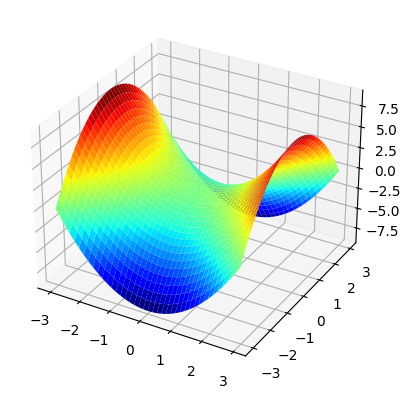

In [40]:
#3d plot
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111, projection = '3d')
x1 = y1 = np.arange(-3.0, 3.0, 0.05)
X1, Y1 = np.meshgrid(x1, y1)
z1 = fun(X1, Y1)
ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet')
plt.show()

When applying gradient descent to this function, our objective still remains the same, except that now we have two parameters, $ θ_1 $ and $ θ_2 $, to optimise:

$$ min_{\theta_1, \theta_2} J(\theta_1, \theta_2) $$

### Update rule
Another feature of gradient descent is that, it is an iterative algorithm. Therefore, it uses the update rule to systemically and efficiently update the values of parameters after each iteration.

This was the update rule for univariate gradient descent:

$$ \theta := \theta - \alpha \frac{d   J(\theta)}{d\theta} $$ 

Where $\alpha$ is the learning rate and $dJ(\theta)/d\theta$ is the derivative of $J(\theta)$ — i.e. the slope of a tangent line that touches the $J(\theta)$ at given $\theta$.

Now that we have two variables, we need to supply an update rule for each:

$$ \theta_1 := \theta_1 - \alpha \frac{\partial   J(\theta_1, \theta_2)}{\partial \theta_1} $$ 
$$ \theta_2 := \theta_2 - \alpha \frac{\partial   J(\theta_1, \theta_2)}{\partial \theta_2} $$ 

These equations look almost identical to the one for univariate functions. The only change here is the derivative term, $\partial J(\theta1, \theta2)/\partial \theta1$ and $\partial J(\theta1, \theta2)/\partial \theta2$.

### Partial derivative
Cosidering general cost function of -
$$ J(\theta_1, \theta_2) = \theta_1^2 +  \theta_2^2 $$

In partial derivatives, just as in normal derivatives, we are still interested in the slope of a tangent that touches $J(\theta1, \theta2)$ at given $\theta1$ or $\theta2$… but this or here is crucial.

Essentially, we cannot move both θ1 and θ2 at the same time when looking at a tangent. Therefore, we focus on only one variable at a time, whilst holding the other constant. Hence, the name partial.

Using graphs-

<img src="partial_d.png" alt="image.png" width="250"/>
Let’s consider $\theta1$ as a variable and keep $\theta2$ constant, in other words, a partial derivative of $\theta1$.

What keeping $\theta2$ constant visually translates to is a $\theta1-J(\theta1, \theta2)$ plane (Fig- blue square) cutting through the graph at a particular value of $\theta2$. The Fig red line represents the intersect between the $\theta1-J(\theta1, \theta2)$ plane and the $J(\theta1, \theta2)$ plot, which becomes the function of interest in the partial derivative.

Now, if we extract the blue plane along with the red line, what we end up is a good-old univariate function with θ1 as a parameter, on a 2D plane.

Therefore, we can calculate the partial derivate term in the update function as follows, as $\partial \theta1$ shrink towards zero:
<img src="partial_d_formula.png" alt="image.png" />

Now, cosider original cost function ,

$ J(\theta_1, \theta_2) = \theta_1^2 -  \theta_2^2$ -
$$
\frac{\partial J(\theta1, \theta2)}{\partial \theta_1} =  
\frac{\partial (\theta_1^2 -  \theta_2^2)}{\partial \theta_1} =
2 \theta_1$$

and,
$$
\frac{\partial J(\theta1, \theta2)}{\partial \theta_2} =  
\frac{\partial (\theta_1^2 -  \theta_2^2)}{\partial \theta_2} =
-2 \theta_2$$

### Simultaneous update
We can simplify update rules as follows:
$$ \theta_1 := \theta_1 - \alpha (2 \theta_1) = (1 - 2\alpha)\theta_1 $$ 
$$ \theta_2 := \theta_2 - \alpha (-2 \theta_2) = (1 + 2\alpha)\theta_2 $$ 

In [5]:
theta1 = 3
theta2 = 0.0001
alpha = 1e-1  #learning rate
theta1_hist = []
theta2_hist = []
J_hist = []
iterations = 20
for i in range(iterations) :
    theta1_hist.append(theta1)
    theta2_hist.append(theta2)
    J = fun(theta1, theta2)
    
    J_hist.append(J)
    theta1 = ((1 - (2 * alpha)))* theta1
    theta2 = ((1 + (2 * alpha)))* theta2  
   
    print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')

Iteration = 1 , theta1 = 2.4000000000000004, theta2 = 0.00012, J = 8.99999999
Iteration = 2 , theta1 = 1.9200000000000004, theta2 = 0.000144, J = 5.759999985600001
Iteration = 3 , theta1 = 1.5360000000000005, theta2 = 0.0001728, J = 3.686399979264001
Iteration = 4 , theta1 = 1.2288000000000006, theta2 = 0.00020736, J = 2.3592959701401615
Iteration = 5 , theta1 = 0.9830400000000005, theta2 = 0.000248832, J = 1.5099493970018316
Iteration = 6 , theta1 = 0.7864320000000005, theta2 = 0.0002985984, J = 0.9663675796826366
Iteration = 7 , theta1 = 0.6291456000000004, theta2 = 0.00035831808, J = 0.6184752014629963
Iteration = 8 , theta1 = 0.5033164800000004, theta2 = 0.000429981696, J = 0.3958240576075141
Iteration = 9 , theta1 = 0.40265318400000033, theta2 = 0.0005159780352, J = 0.2533272941553319
Iteration = 10 , theta1 = 0.3221225472000003, theta2 = 0.00061917364224, J = 0.16212932035200533
Iteration = 11 , theta1 = 0.2576980377600002, theta2 = 0.000743008370688, J = 0.10376255203861717
Iter

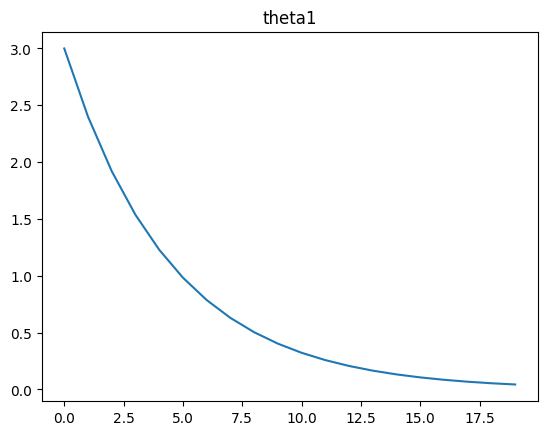

In [6]:
%matplotlib inline
plt.figure()
plt.title('theta1')
plt.plot(theta1_hist)
plt.show()

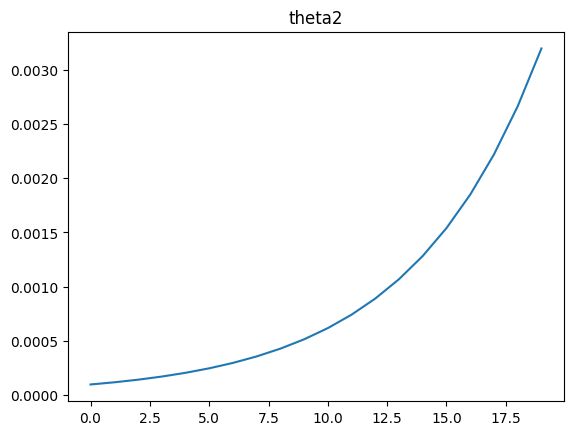

In [7]:
%matplotlib inline
plt.figure()
plt.title('theta2')
plt.plot(theta2_hist)
plt.show()

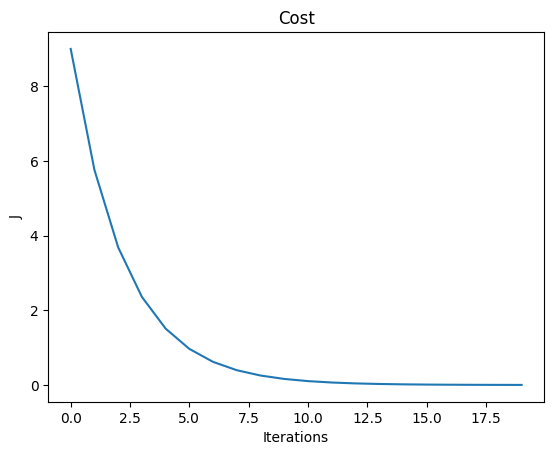

In [8]:
%matplotlib inline
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_hist)
plt.show()

In [102]:
def plot_3d(theta1, theta2, J, label) :
    fig_1 = plt.figure()
    ax_1 = fig_1.add_subplot(111, projection = '3d')
    x1 = y1 = np.arange(-3, 3, 0.05)
    X1, Y1 = np.meshgrid(x1, y1)
    z1 = fun(X1, Y1)
    ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
    ax_1.plot(theta1, theta2, J, linewidth=2, label = label)
    ax_1.plot(theta1[0], theta2[0], J[0], marker="o", markersize=10,markerfacecolor="black")
    ax_1.plot(theta1[-1], theta2[-1], J[-1], marker="o", markersize=10,markerfacecolor="white")
    plt.legend()
    ax_1.set_xlabel('θ1 or x')
    ax_1.set_ylabel('θ2 or y')
    ax_1.set_zlabel('J or z')
    plt.show()
    
def plot_3d_dynamic(theta1, theta2, J, label, iterations) :
    fig_1 = plt.figure()
    ax_1 = fig_1.add_subplot(111, projection = '3d')
    x1 = y1 = np.arange(-3, 3, 0.05)
    X1, Y1 = np.meshgrid(x1, y1)
    ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
    ax_1.plot(theta1[0], theta2[0], J[0], marker="o", markersize=10,markerfacecolor="black")
    ax_1.plot(theta1[-1], theta2[-1], J[-1], marker="o", markersize=10,markerfacecolor="white")

    

    #this just draws the line , prev line is overlapped
    for i in range(iterations):
        ax_1.plot(theta1[:i+1], theta2[:i+1], J[:i+1], linewidth=2, label = label, c = 'red')
        ax_1.set_xlabel('θ1 or x')
        ax_1.set_ylabel('θ2 or y')
        ax_1.set_zlabel('J or z')
        plt.draw()
        plt.pause(0.01)

In [104]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_hist, theta2=theta2_hist, J = J_hist, label = 'Vanilla GD')

In [11]:
#3d plot dynamic 
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_hist, theta2=theta2_hist, J = J_hist, label = 'Vanilla GD', iterations=iterations)

### Momentum
- Improvement to Vanilla GD
- Without momentum : GD →

	- $\theta_t ← \theta_{t-1} - \nu g_t$
- With momentum, 2 steps :

	- $\nu_t ← \mu \nu_{t - 1} - \eta g_t$, where $\nu_t$ = velocity, $\mu$ = momentum term
    - $\theta_t ← \theta_{t-1} + \nu_t$
- Momentum term $\mu$ is typically of order 0.9, 0.95, 0.99, etc.
- If $\mu$ is 0, we get original GD without any Momentum

In [12]:
theta1 = 3
theta2 = 0.0001
alpha = 1e-1  #learning rate
mu = 0.95
v1 = 0
v2 = 0
iterations_momen = 27

theta1_momen_hist = []
theta2_momen_hist = []
J_momen_hist = []
for i in range(iterations_momen) :
    theta1_momen_hist.append(theta1)
    theta2_momen_hist.append(theta2)
    J = fun(theta1, theta2)
    
    J_momen_hist.append(J)
    v1 = (mu * v1) - (alpha * (2 * theta1))
    v2 = (mu * v2) - (alpha * (-2 * theta2))
    theta1 = theta1 + v1
    theta2 = theta2 + v2
   
    print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')

Iteration = 1 , theta1 = 2.4, theta2 = 0.00012, J = 8.99999999
Iteration = 2 , theta1 = 1.3499999999999999, theta2 = 0.000163, J = 5.7599999855999995
Iteration = 3 , theta1 = 0.08250000000000002, theta2 = 0.00023645, J = 1.8224999734309997
Iteration = 4 , theta1 = -1.1381249999999998, theta2 = 0.0003535175, J = 0.006806194091397503
Iteration = 5 , theta1 = -2.07009375, theta2 = 0.000535435125, J = 1.2953283906503767
Iteration = 6 , theta1 = -2.5414453124999996, theta2 = 0.0008153438937499998, J = 4.285287847098289
Iteration = 7 , theta1 = -2.4809402343749993, theta2 = 0.0012443260028124998, J = 6.458943611642556
Iteration = 8 , theta1 = -1.9272723632812494, theta2 = 0.0019007242069843746, J = 6.155062898193475
Iteration = 9 , theta1 = -1.015833413085937, theta2 = 0.0029044473423445304, J = 3.714375149515181
Iteration = 10 , theta1 = 0.05320027221679724, theta2 = 0.004438873789405585, J = 1.0319090873274595
Iteration = 11 , theta1 = 1.0581422188110354, theta2 = 0.006784353671994703, J =

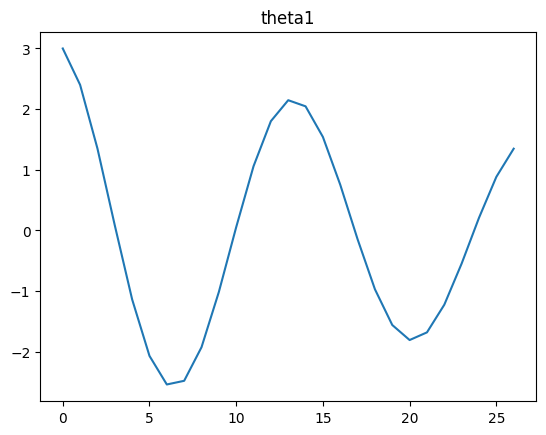

In [13]:
%matplotlib inline
plt.figure()
plt.title('theta1')
plt.plot(theta1_momen_hist)
plt.show()

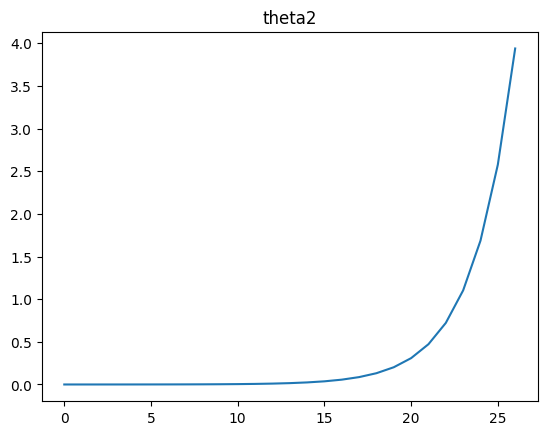

In [14]:
%matplotlib inline
plt.figure()
plt.title('theta2')
plt.plot(theta2_momen_hist)
plt.show()

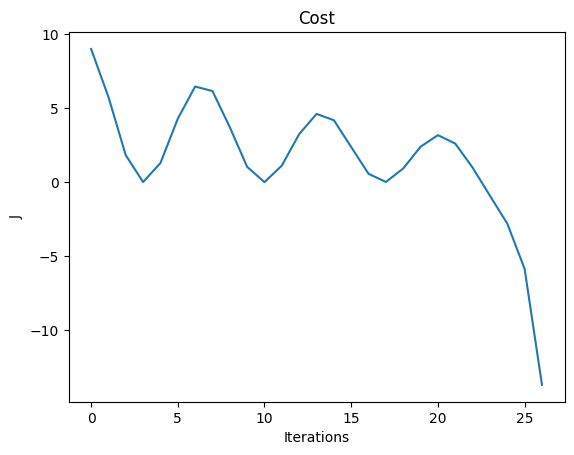

In [15]:
%matplotlib inline
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_momen_hist)
plt.show()

In [105]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_momen_hist, theta2=theta2_momen_hist, J=J_momen_hist, label = 'Momentum')

In [103]:
#3d plot dynamic 
plot_3d_dynamic(theta1=theta1_momen_hist, theta2=theta2_momen_hist, J=J_momen_hist, label = 'Momentum', iterations = iterations_momen)

### AdaGrad
- Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. 
- The more updates a parameter receives, the smaller the updates.

$ cache = cache + (\triangledown J)^2 $

$ \theta ← \theta - \eta \frac{\triangledown J}{\sqrt{cache + \epsilon}}$

,where $\triangledown J$ is gradient

- Each paramter of Neural Network has its own cache.
	- eg. weight matrix of size 3 X 4, then cache matrix of size 3 X 4. Similarly with bias matrix.
- Cache accumulates squared gradients.
- Since each param has its own cache, so if one param has had a lot of large gradients in the past, then its cache will be very large and its **effective learning rate** will be very small, so it will change more slowly in the future.
- On the other hand, if the param has had a lot of small gradients in the past, then its cache will be small, so its **effective LR** will remain large and it will have more opportunity to change in future.
- To avoid dividing by zero, we add a small number $\epsilon$ of order $10^{-8}$, $10^{-9}$, $10^{-10}$, etc.
- Each scalar param is updated independently of others.

In [18]:
theta1 = 3
theta2 = 0.0001
eta = 1e-1  #learning rate
epsilon = 10e-8
cache1 = 1 #initial cache is implemented differently in different packages. EXPERIMENT
cache2 = 1
iterations_adagrad = 1000

theta1_adagrad_hist = []
theta2_adagrad_hist = []
J_adagrad_hist = []

for i in range(iterations_adagrad) :
    theta1_adagrad_hist.append(theta1)
    theta2_adagrad_hist.append(theta2)
    J = fun(theta1, theta2)
    J_adagrad_hist.append(J)
    print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')
    
    grad1 = (alpha * (2 * theta1))
    grad2 = (alpha * (-2 * theta1))
    cache1 += grad1 ** 2
    cache2 += grad2 ** 2
    theta1 -=  eta * (grad1 / (np.sqrt(cache1 + epsilon)))
    theta2 -=  eta * (grad2 / (np.sqrt(cache2 + epsilon)))

Iteration = 1 , theta1 = 3, theta2 = 0.0001, J = 8.99999999
Iteration = 2 , theta1 = 2.948550426348776, theta2 = 0.05154957365122426, J = 8.691292258177926
Iteration = 3 , theta1 = 2.9034245779355365, theta2 = 0.09667542206446364, J = 8.420528142528807
Iteration = 4 , theta1 = 2.8628177679588407, theta2 = 0.1372822320411597, J = 8.176879161306637
Iteration = 5 , theta1 = 2.82564757865866, theta2 = 0.17445242134134015, J = 7.953850591467693
Iteration = 6 , theta1 = 2.7912048075796196, theta2 = 0.2088951924203808, J = 7.747187076439234
Iteration = 7 , theta1 = 2.758995070825017, theta2 = 0.24110492917498325, J = 7.553922213964267
Iteration = 8 , theta1 = 2.728657518341507, theta2 = 0.27144248165849333, J = 7.371890831552711
Iteration = 9 , theta1 = 2.699919245915401, theta2 = 0.30018075408459977, J = 7.199455449341588
Iteration = 10 , theta1 = 2.6725679433276572, theta2 = 0.32753205667234325, J = 7.035342163554609
Iteration = 11 , theta1 = 2.6464345890518994, theta2 = 0.3536654109481012,

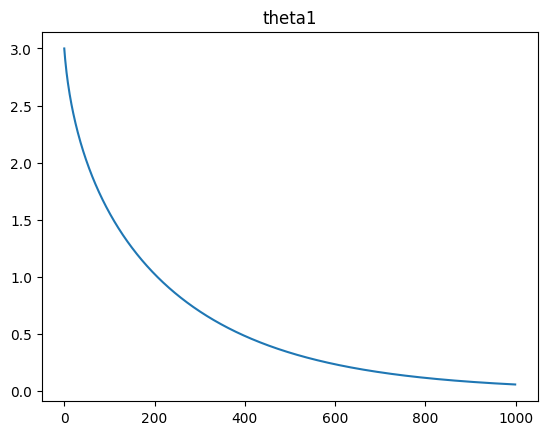

In [19]:
%matplotlib inline
plt.figure()
plt.title('theta1')
plt.plot(theta1_adagrad_hist)
plt.show()

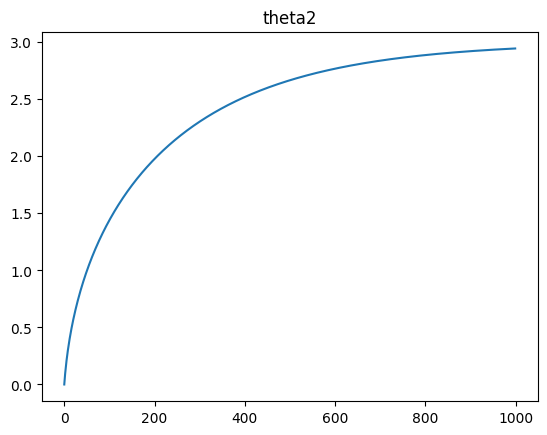

In [20]:
%matplotlib inline
plt.figure()
plt.title('theta2')

plt.plot(theta2_adagrad_hist)
plt.show()

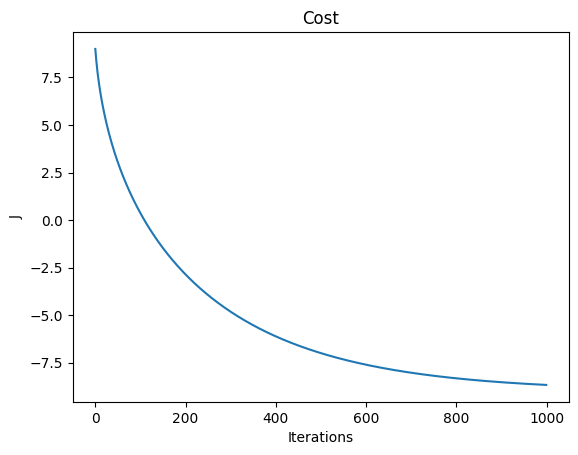

In [21]:
%matplotlib inline
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_adagrad_hist)
plt.show()

In [106]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_adagrad_hist, theta2=theta2_adagrad_hist, J=J_adagrad_hist, label = 'AdaGrad')

In [ ]:
#3d dynamic plot
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_adagrad_hist, theta2=theta2_adagrad_hist, J=J_adagrad_hist, label = 'AdaGrad', iterations = iterations_adagrad)

### AdaDelta
- AdaDelta is a stochastic optimization technique that allows for per-dimension learning rate method for SGD. 
- It deals with learning rate becoming very small because cache increases to very large value.
- It is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. 
- Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated past gradients to a fixed size $w$ .
- Instead of inefficiently storing $w$ previous squared gradients, the sum of gradients is recursively defined as a decaying average of all past squared gradients. The running average $E[g^2]_t$ at time step $t$ then depends only on the previous average and current gradient:
$$  E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma)g_t^2 $$
- Usually $\gamma$ is set to around $0.9$ .
- So, GD updates become -

$  E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma)g_t^2 $  (weighted avegarge)

$ \theta_t = \theta_{t-1} - \eta \frac{\triangledown J}{\sqrt{E[g^2]_t + \epsilon}}$

,where $\triangledown J$ is gradient.

- The main advantage of AdaDelta is that we do not need to set a default learning rate.

In [26]:
theta1 = 3
theta2 = 0.0001
eta = 1e-1  #learning rate
epsilon = 10e-8
E1 = 1 #initial cache is implemented differently in different packages. EXPERIMENT
E2 = 1
gamma = 0.95
iterations_adadelta = 100

theta1_adadelta_hist = []
theta2_adadelta_hist = []
J_adadelta_hist = []

for i in range(iterations_adagrad) :
    theta1_adadelta_hist.append(theta1)
    theta2_adadelta_hist.append(theta2)
    J = fun(theta1, theta2)
    J_adadelta_hist.append(J)
    print(f'Iteration = {i + 1} , theta1 = {theta1}, theta2 = {theta2}, J = {J}')
    
    grad1 = (alpha * (2 * theta1))
    grad2 = (alpha * (-2 * theta1))
    E1 = (gamma * E1) + (1- gamma) * (grad1 ** 2)
    E2 = (gamma * E2) + (1- gamma) * (grad2 ** 2)
    theta1 -=  eta * (grad1 / (np.sqrt(E1 + epsilon)))
    theta2 -=  eta * (grad2 / (np.sqrt(E2 + epsilon)))

Iteration = 1 , theta1 = 3, theta2 = 0.0001, J = 8.99999999
Iteration = 2 , theta1 = 2.939016331036352, theta2 = 0.06108366896364782, J = 8.634085779484321
Iteration = 3 , theta1 = 2.878288048391403, theta2 = 0.12181195160859727, J = 8.269703937958095
Iteration = 4 , theta1 = 2.8178297187220833, theta2 = 0.18227028127791695, J = 7.9069418682762445
Iteration = 5 , theta1 = 2.7576559128476634, theta2 = 0.24244408715233673, J = 7.54588699826855
Iteration = 6 , theta1 = 2.6977812118474835, theta2 = 0.30231878815251645, J = 7.18662681732727
Iteration = 7 , theta1 = 2.638220213092531, theta2 = 0.36187978690746875, J = 6.829248912597805
Iteration = 8 , theta1 = 2.5789875361612733, theta2 = 0.4211124638387268, J = 6.473841004474872
Iteration = 9 , theta1 = 2.5200978285887143, theta2 = 0.4800021714112856, J = 6.120490981098004
Iteration = 10 , theta1 = 2.461565771395999, theta2 = 0.5385342286040009, J = 5.769286931530273
Iteration = 11 , theta1 = 2.40340608434599, theta2 = 0.5966939156540098, J

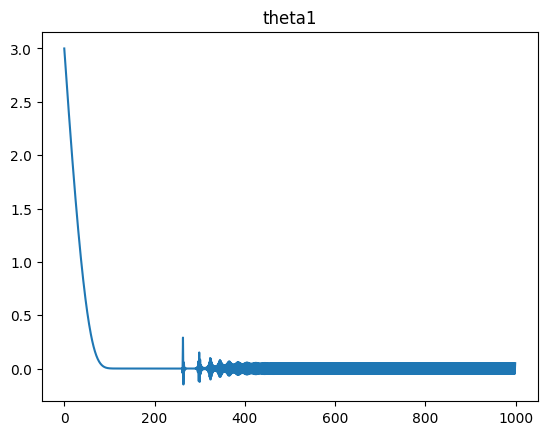

In [27]:
%matplotlib inline
plt.figure()
plt.title('theta1')
plt.plot(theta1_adadelta_hist)
plt.show()

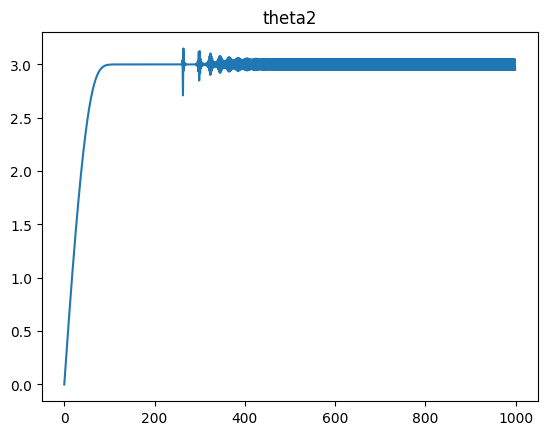

In [28]:
%matplotlib inline
plt.figure()
plt.title('theta2')

plt.plot(theta2_adadelta_hist)
plt.show()

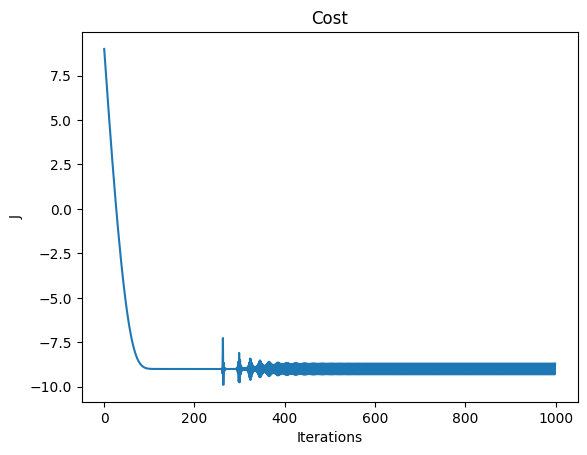

In [29]:
%matplotlib inline
plt.figure()
plt.title('Cost')
plt.ylabel('J')
plt.xlabel('Iterations')
plt.plot(J_adadelta_hist)
plt.show()

In [107]:
#3d plot
matplotlib.use('TkAgg')
plot_3d(theta1=theta1_adadelta_hist, theta2=theta2_adadelta_hist, J=J_adadelta_hist, label = 'AdaDelta')

In [31]:
#3d dynamic plot
matplotlib.use('TkAgg')
plot_3d_dynamic(theta1=theta1_adadelta_hist, theta2=theta2_adadelta_hist, J=J_adadelta_hist, label = 'AdaDelta', iterations=iterations_adadelta)

In [32]:
#3d plot dynamic - comparison
matplotlib.use('TkAgg')
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(111, projection = '3d')

x1 = y1 = np.arange(-3, 3, 0.05)
X1, Y1 = np.meshgrid(x1, y1)
#ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
#ax_1.plot(theta1_momen_hist[0], theta2_momen_hist[0], J_momen_hist[0], marker="o", markersize=10,markerfacecolor="black")
#ax_1.plot(theta1_momen_hist[-1], theta2_momen_hist[-1], J_momen_hist[-1], marker="o", markersize=10,markerfacecolor="white")

z1 = fun(X1, Y1)


#this just draws the line , prev line is overlapped
for i in range(100):
    ax_1.cla()
    ax_1.set_xlim(-3, 3)
    ax_1.set_ylim(-3, 3)
    ax_1.set_zlim(-10, 10)
    
    ax_1.plot_surface(X1, Y1, z1, linewidth = 0.2, antialiased = True, cmap = 'jet', alpha=0.5)
    
    #momentum
    ax_1.plot(theta1_momen_hist[0], theta2_momen_hist[0], J_momen_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_momen_hist[-1], theta2_momen_hist[-1], J_momen_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_momen_hist) :
        ax_1.plot(theta1_momen_hist[:i], theta2_momen_hist[:i], J_momen_hist[:i], linewidth=2, label = 'Momentum', c = 'red')
        ax_1.plot(theta1_momen_hist[i], theta2_momen_hist[i], J_momen_hist[i], marker="o", markersize=10,markerfacecolor="red", markeredgecolor='red')
    else:
        ax_1.plot(theta1_momen_hist, theta2_momen_hist, J_momen_hist, linewidth=2, label = 'Momentum', c = 'red')
        ax_1.plot(theta1_momen_hist[-1], theta2_momen_hist[-1], J_momen_hist[-1], marker="o", markersize=10,markerfacecolor="red", markeredgecolor='red')
        
    
    #vanilla GD
    ax_1.plot(theta1_hist[0], theta2_hist[0], J_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_hist[-1], theta2_hist[-1], J_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_hist) :
        ax_1.plot(theta1_hist[:i], theta2_hist[:i], J_hist[:i], linewidth=2, label = 'Vanilla GD', c = 'gray')
        ax_1.plot(theta1_hist[i], theta2_hist[i], J_hist[i], marker="o", markersize=10,markerfacecolor="gray", markeredgecolor='gray')
        
    else :
        ax_1.plot(theta1_hist, theta2_hist, J_hist, linewidth=2, label = 'Vanilla GD', c = 'gray')
        ax_1.plot(theta1_hist[-1], theta2_hist[-1], J_hist[-1], marker="o", markersize=10,markerfacecolor="gray", markeredgecolor='gray')
        
        
    #adagrad
    color_adagrad = 'blue'
    ax_1.plot(theta1_adagrad_hist[0], theta2_adagrad_hist[0], J_adagrad_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_adagrad_hist[-1], theta2_adagrad_hist[-1], J_adagrad_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_adagrad_hist) :
        ax_1.plot(theta1_adagrad_hist[:i], theta2_adagrad_hist[:i], J_adagrad_hist[:i], linewidth=2, label = 'AdaGrad', c = color_adagrad)
        ax_1.plot(theta1_adagrad_hist[i], theta2_adagrad_hist[i], J_adagrad_hist[i], marker="o", markersize=10,markerfacecolor=color_adagrad, markeredgecolor=color_adagrad)
        
    else :
        ax_1.plot(theta1_adagrad_hist, theta2_adagrad_hist, J_adagrad_hist, linewidth=2, label = 'AdaGrad', c = color_adagrad)
        ax_1.plot(theta1_adagrad_hist[-1], theta2_adagrad_hist[-1], J_adagrad_hist[-1], marker="o", markersize=10,markerfacecolor=color_adagrad, markeredgecolor=color_adagrad)
        
    #adadelta
    color_adadelta = 'green'
    ax_1.plot(theta1_adadelta_hist[0], theta2_adadelta_hist[0], J_adadelta_hist[0], marker="o", markersize=5,markerfacecolor="black")
    ax_1.plot(theta1_adadelta_hist[-1], theta2_adadelta_hist[-1], J_adadelta_hist[-1], marker="o", markersize=5,markerfacecolor="white")
    if i < len(theta1_adadelta_hist) :
        ax_1.plot(theta1_adadelta_hist[:i], theta2_adadelta_hist[:i], J_adadelta_hist[:i], linewidth=2, label = 'AdaDelta', c = color_adadelta)
        ax_1.plot(theta1_adadelta_hist[i], theta2_adadelta_hist[i], J_adadelta_hist[i], marker="o", markersize=10,markerfacecolor=color_adadelta, markeredgecolor=color_adadelta)
        
    else :
        ax_1.plot(theta1_adadelta_hist, theta2_adadelta_hist, J_adadelta_hist, linewidth=2, label = 'AdaDelta', c = color_adadelta)
        ax_1.plot(theta1_adadelta_hist[-1], theta2_adadelta_hist[-1], J_adadelta_hist[-1], marker="o", markersize=10,markerfacecolor=color_adadelta, markeredgecolor=color_adadelta)
        

    ax_1.set_xlabel('θ1 or x')
    ax_1.set_ylabel('θ2 or y')
    ax_1.set_zlabel('J or z')
    plt.legend()
    plt.draw()
    plt.pause(0.01)

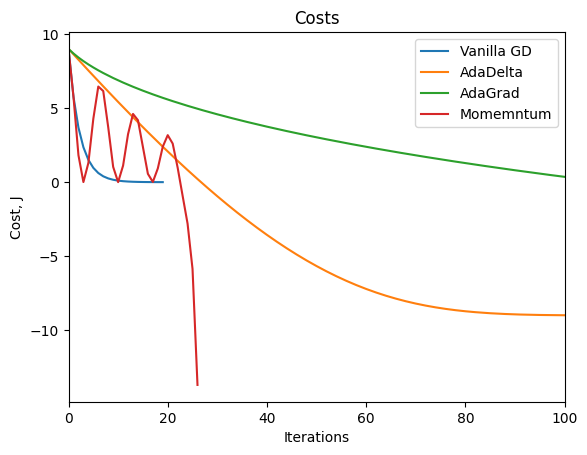

In [109]:
%matplotlib inline
fig = plt.figure()
plt.title('Costs')
plt.xlabel('Iterations')
plt.ylabel('Cost, J')
plt.xlim(0, 100)
plt.plot(J_hist, label = 'Vanilla GD')
plt.plot(J_adadelta_hist, label = 'AdaDelta')
plt.plot(J_adagrad_hist, label =  'AdaGrad')
plt.plot(J_momen_hist, label = 'Momemntum')
plt.legend()
plt.show()

In [73]:
?ax_1.plot_surface